In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from collections import defaultdict

In [40]:
data = pd.read_csv('data/data.csv').drop('Unnamed: 0', axis = 1)

In [41]:
data['revenue'] = np.where(data['purchase'] == False, 0, 15)
data.replace({True: 1, False: 0}, inplace = True)
data.head()

,uid,timestamp,channel,clickthrough,purchase,gender,age,revenue
0,2697588,2021-01-01 08:00:00,facebook,0,0,Female,Gen Alpha,0
1,2697588,2021-01-02 08:00:00,email,0,0,Female,Gen Alpha,0
2,2697588,2021-01-02 09:20:00,search,0,0,Female,Gen Alpha,0
3,2697588,2021-01-02 10:40:00,search,0,1,Female,Gen Alpha,15
4,2697588,2021-01-02 12:00:00,facebook,0,0,Female,Gen Alpha,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822361 entries, 0 to 6822360
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   uid           int64 
 1   timestamp     object
 2   channel       object
 3   clickthrough  bool  
 4   purchase      bool  
 5   gender        object
 6   age           object
dtypes: bool(2), int64(1), object(4)
memory usage: 273.3+ MB


In [ ]:
heat = sns.heatmap(data[['channel', 'clickthrough','purchase']]).corr()
heat

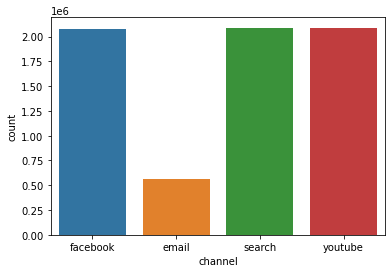

In [9]:
sns.countplot(x = 'channel', data = data)
plt.show()

Text(0, 0.5, 'Purchases')

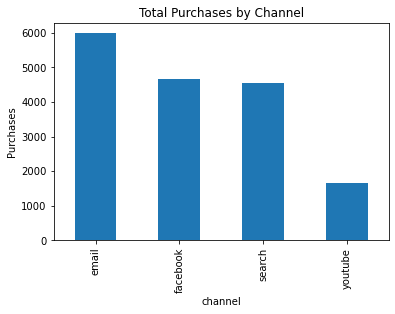

In [12]:
channels = data.groupby('channel')['purchase'].sum()
channels.plot.bar()
plt.title('Total Purchases by Channel')
plt.ylabel('Purchases')

Text(0.5, 1.0, 'Total Visits Per Channel')

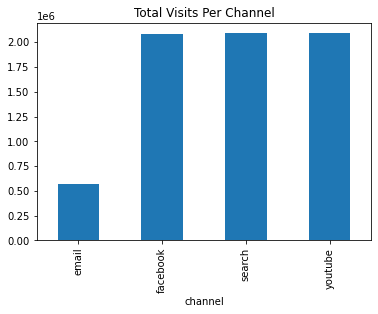

In [14]:
visits = data.groupby('channel')['timestamp'].count()
visits.plot.bar()
plt.title('Total Visits Per Channel')

<AxesSubplot:ylabel='gender,channel'>

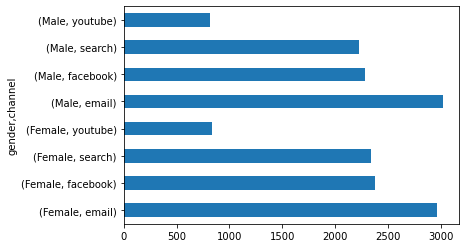

In [13]:
gender = data.groupby(['gender', 'channel'])['purchase'].sum()
gender.plot(kind = 'barh')

In [22]:
data.groupby(['gender', 'age', 'channel'])['revenue'].sum()

gender  age        channel 
Female  Boomer     email        4170
                   facebook     3780
                   search       3600
                   youtube      1365
        Gen Alpha  email       32385
                   facebook    25500
                   search      24510
                   youtube      8625
        Gen Z      email        3870
                   facebook     2970
                   search       3585
                   youtube      1215
        Millenial  email        4080
                   facebook     3420
                   search       3330
                   youtube      1275
Male    Boomer     email        4305
                   facebook     3075
                   search       3510
                   youtube      1155
        Gen Alpha  email       31725
                   facebook    24255
                   search      22740
                   youtube      8520
        Gen Z      email        4425
                   facebook     3015
          

In [29]:
conversions = data.groupby('channel')['purchase'].sum()
conversions

channel
email       5982
facebook    4662
search      4561
youtube     1650
Name: purchase, dtype: int64

<AxesSubplot:xlabel='gender,channel'>

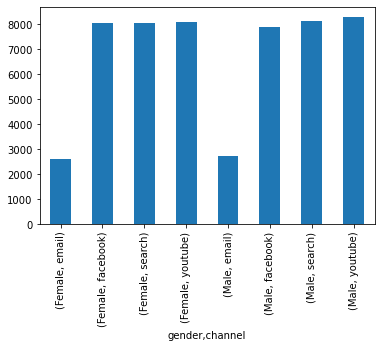

In [32]:
clickthrough = data.groupby(['gender', 'channel'])['clickthrough'].sum()

clickthrough.plot.bar()

In [26]:
data[(data['uid'] == 2697588) & (data['purchase'] == 1)]

,uid,timestamp,channel,clickthrough,purchase,gender,age,revenue
3,2697588,2021-01-02 10:40:00,search,0,1,Female,Gen Alpha,15
366,2697588,2021-03-21 17:50:46,search,0,1,Female,Gen Alpha,15


In [39]:
pur = data[data['purchase']==1].groupby('channel')['timestamp'].mean()

pur

DataError: No numeric types to aggregate

Text(0.5, 1.0, 'Channel Clickthrough by Gender')

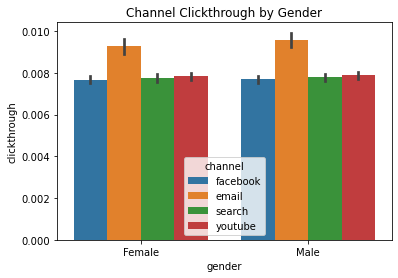

In [15]:
ax = sns.barplot(x = data['gender'], y = data['clickthrough'], hue = data['channel'])
ax.set_title('Channel Clickthrough by Gender')

Text(0.5, 1.0, 'Channel Purchase by Gender')

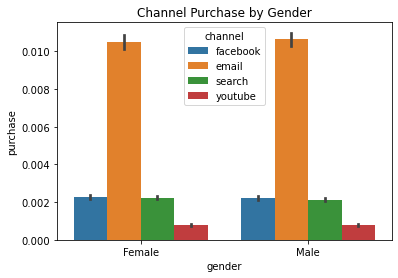

In [16]:
ax = sns.barplot(x = data['gender'], y = data['purchase'], hue = data['channel'])
ax.set_title('Channel Purchase by Gender')

In [13]:
test = data[data['uid'] == 1000276]
test[test['channel']== 'email']

,uid,timestamp,channel,clickthrough,purchase,gender,age
5384917,1000276,2021-01-01 11:12:00,email,False,False,Male,Gen Alpha
5384942,1000276,2021-01-02 15:16:21,email,False,False,Male,Gen Alpha
5384955,1000276,2021-01-03 22:24:00,email,False,False,Male,Gen Alpha
5384957,1000276,2021-01-04 10:17:08,email,False,False,Male,Gen Alpha
5384971,1000276,2021-01-06 15:34:44,email,False,False,Male,Gen Alpha
5384988,1000276,2021-01-07 19:12:00,email,False,False,Male,Gen Alpha
5384995,1000276,2021-01-08 11:02:51,email,False,False,Male,Gen Alpha
5385013,1000276,2021-01-10 11:20:00,email,False,False,Male,Gen Alpha
5385036,1000276,2021-01-14 11:33:20,email,False,False,Male,Gen Alpha
5385051,1000276,2021-01-15 11:12:00,email,False,False,Male,Gen Alpha


In [82]:
#trying to note down the marketing path until a conversion
def marketing_path(uid, data): 
    user = data[data['uid'] == uid] 
    path = []
    for channel, buy in zip(user['channel'], user['purchase']):
        if buy == 0:
            path.append(channel)
        elif buy == 1:
            path.append(channel)
            break
    return path
            
marketing_path(2697588, test)

['facebook', 'email', 'search', 'search']

In [69]:
#am easier way to follow the marketing path of a customer
path = data.groupby('uid')['channel'].aggregate(lambda x: x.unique().tolist()).reset_index()


In [70]:
#removing duplicated UID's and keeping purchase data
last = data.drop_duplicates('uid', keep = 'last')[['uid','purchase','gender','age']]
last

,uid,purchase,gender,age
481,2697588,0,Female,Gen Alpha
1006,9569845,0,Female,Gen Alpha
1343,4983829,0,Female,Gen Alpha
2223,4183239,0,Male,Gen Alpha
3073,4984417,0,Male,Gen Z
...,...,...,...,...
6819758,5466211,0,Female,Gen Alpha
6819982,9024244,0,Male,Gen Alpha
6820860,9018528,0,Female,Gen Alpha
6821661,2277899,0,Female,Gen Alpha


In [71]:
path = pd.merge(path, last, how = "left", on = 'uid')
path

,uid,channel,purchase,gender,age
0,1000276,"[facebook, search, youtube, email]",0,Male,Gen Alpha
1,1001694,"[email, youtube, search, facebook]",0,Female,Gen Alpha
2,1002585,"[facebook, email, youtube, search]",0,Male,Gen Alpha
3,1003246,"[email, youtube, search, facebook]",0,Male,Boomer
4,1003254,"[facebook, search, youtube, email]",0,Female,Gen Alpha
...,...,...,...,...,...
9988,9993220,"[youtube, search, email, facebook]",0,Male,Gen Alpha
9989,9993273,"[facebook, youtube, search, email]",0,Female,Gen Alpha
9990,9996991,"[facebook, search, youtube, email]",0,Female,Gen Alpha
9991,9997701,"[search, email, facebook, youtube]",0,Male,Boomer


In [138]:
path[path['purchase'] == 1].count()

uid         37
channel     37
purchase    37
dtype: int64

In [72]:
con = []
for row in path['purchase']:
    if row == 1:
        con.append(['conversion'])
    else:
        con.append(['end'])
        
con.count(['conversion'])

37

In [73]:
path['conversion'] = con
path['channel'] = path['channel'] + path['conversion']
path

,uid,channel,purchase,gender,age,conversion
0,1000276,"[facebook, search, youtube, email, end]",0,Male,Gen Alpha,[end]
1,1001694,"[email, youtube, search, facebook, end]",0,Female,Gen Alpha,[end]
2,1002585,"[facebook, email, youtube, search, end]",0,Male,Gen Alpha,[end]
3,1003246,"[email, youtube, search, facebook, end]",0,Male,Boomer,[end]
4,1003254,"[facebook, search, youtube, email, end]",0,Female,Gen Alpha,[end]
...,...,...,...,...,...,...
9988,9993220,"[youtube, search, email, facebook, end]",0,Male,Gen Alpha,[end]
9989,9993273,"[facebook, youtube, search, email, end]",0,Female,Gen Alpha,[end]
9990,9996991,"[facebook, search, youtube, email, end]",0,Female,Gen Alpha,[end]
9991,9997701,"[search, email, facebook, youtube, end]",0,Male,Boomer,[end]


In [74]:
path['test'] = path['channel'].map(lambda x: x.insert(0,'start'))

path

,uid,channel,purchase,gender,age,conversion,test
0,1000276,"[start, facebook, search, youtube, email, end]",0,Male,Gen Alpha,[end],None
1,1001694,"[start, email, youtube, search, facebook, end]",0,Female,Gen Alpha,[end],None
2,1002585,"[start, facebook, email, youtube, search, end]",0,Male,Gen Alpha,[end],None
3,1003246,"[start, email, youtube, search, facebook, end]",0,Male,Boomer,[end],None
4,1003254,"[start, facebook, search, youtube, email, end]",0,Female,Gen Alpha,[end],None
...,...,...,...,...,...,...,...
9988,9993220,"[start, youtube, search, email, facebook, end]",0,Male,Gen Alpha,[end],None
9989,9993273,"[start, facebook, youtube, search, email, end]",0,Female,Gen Alpha,[end],None
9990,9996991,"[start, facebook, search, youtube, email, end]",0,Female,Gen Alpha,[end],None
9991,9997701,"[start, search, email, facebook, youtube, end]",0,Male,Boomer,[end],None


In [75]:
path = path[['uid','channel','gender','age']]
#1105013
path

,uid,channel,gender,age
0,1000276,"[start, facebook, search, youtube, email, end]",Male,Gen Alpha
1,1001694,"[start, email, youtube, search, facebook, end]",Female,Gen Alpha
2,1002585,"[start, facebook, email, youtube, search, end]",Male,Gen Alpha
3,1003246,"[start, email, youtube, search, facebook, end]",Male,Boomer
4,1003254,"[start, facebook, search, youtube, email, end]",Female,Gen Alpha
...,...,...,...,...
9988,9993220,"[start, youtube, search, email, facebook, end]",Male,Gen Alpha
9989,9993273,"[start, facebook, youtube, search, email, end]",Female,Gen Alpha
9990,9996991,"[start, facebook, search, youtube, email, end]",Female,Gen Alpha
9991,9997701,"[start, search, email, facebook, youtube, end]",Male,Boomer


In [85]:
path[path['gender']== 'Male']

,uid,channel,gender,age
0,1000276,"[start, facebook, search, youtube, email, end]",Male,Gen Alpha
2,1002585,"[start, facebook, email, youtube, search, end]",Male,Gen Alpha
3,1003246,"[start, email, youtube, search, facebook, end]",Male,Boomer
6,1004664,"[start, search, youtube, facebook, email, end]",Male,Millenial
7,1005129,"[start, email, facebook, search, youtube, end]",Male,Gen Alpha
...,...,...,...,...
9984,9986289,"[start, email, facebook, search, youtube, end]",Male,Gen Alpha
9987,9989502,"[start, search, facebook, email, youtube, end]",Male,Gen Alpha
9988,9993220,"[start, youtube, search, email, facebook, end]",Male,Gen Alpha
9991,9997701,"[start, search, email, facebook, youtube, end]",Male,Boomer


In [81]:
num_of_paths = path['channel']

def base_rate(df):
    total_conversion = sum(path.count('conversion') for path in df.tolist())
    base_rate = total_conversion/len(num_of_paths)
    return base_rate
    
base_rate(num_of_paths)

0.003702591814269989

In [51]:
#counting how many times a user went from one channel/state to another

def transition_states(list_of_paths):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    transition_states = {x + '>' + y: 0 for x in list_of_unique_channels for y in list_of_unique_channels}

    for possible_state in list_of_unique_channels:
        if possible_state not in ['conversion', 'end']:
            for user_path in list_of_paths:
                if possible_state in user_path:
                    indices = [i for i, s in enumerate(user_path) if possible_state in s]
                    for col in indices:
                        transition_states[user_path[col] + '>' + user_path[col + 1]] += 1

    return transition_states


trans_states = transition_states(num_of_paths)
trans_states

{'youtube>youtube': 0,
 'youtube>end': 2460,
 'youtube>email': 2571,
 'youtube>search': 2446,
 'youtube>start': 0,
 'youtube>conversion': 10,
 'youtube>facebook': 2469,
 'end>youtube': 0,
 'end>end': 0,
 'end>email': 0,
 'end>search': 0,
 'end>start': 0,
 'end>conversion': 0,
 'end>facebook': 0,
 'email>youtube': 2454,
 'email>end': 2521,
 'email>email': 0,
 'email>search': 2423,
 'email>start': 0,
 'email>conversion': 8,
 'email>facebook': 2543,
 'search>youtube': 2501,
 'search>end': 2482,
 'search>email': 2512,
 'search>search': 0,
 'search>start': 0,
 'search>conversion': 8,
 'search>facebook': 2445,
 'start>youtube': 2524,
 'start>end': 0,
 'start>email': 2428,
 'start>search': 2563,
 'start>start': 0,
 'start>conversion': 0,
 'start>facebook': 2478,
 'conversion>youtube': 0,
 'conversion>end': 0,
 'conversion>email': 0,
 'conversion>search': 0,
 'conversion>start': 0,
 'conversion>conversion': 0,
 'conversion>facebook': 0,
 'facebook>youtube': 2477,
 'facebook>end': 2493,
 'faceb

In [52]:

def transition_prob(trans_dict):
    list_of_unique_channels = set(x for element in num_of_paths for x in element)
    trans_prob = defaultdict(dict)
    for state in list_of_unique_channels:
        if state not in ['conversion', 'end']:
            counter = 0
            index = [i for i, s in enumerate(trans_dict) if state + '>' in s]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    counter += trans_dict[list(trans_dict)[col]]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    state_prob = float((trans_dict[list(trans_dict)[col]])) / float(counter)
                    trans_prob[list(trans_dict)[col]] = state_prob

    return trans_prob


trans_prob = transition_prob(trans_states)
trans_prob

defaultdict(dict,
            {'youtube>end': 0.24708718360787466,
             'youtube>email': 0.2582362394535958,
             'youtube>search': 0.24568099638409,
             'youtube>conversion': 0.001004419445560466,
             'youtube>facebook': 0.24799116110887906,
             'email>youtube': 0.24665795557342446,
             'email>end': 0.2533923007337421,
             'email>search': 0.2435420645290984,
             'email>conversion': 0.0008041009146647904,
             'email>facebook': 0.25560357824907026,
             'search>youtube': 0.25140731805388017,
             'search>end': 0.2494973864093285,
             'search>email': 0.2525130679533575,
             'search>conversion': 0.0008041817450743868,
             'search>facebook': 0.24577804583835947,
             'start>youtube': 0.25257680376263386,
             'start>email': 0.24297007905533874,
             'start>search': 0.2564795356749725,
             'start>facebook': 0.24797358150705495,
          

In [54]:
def transition_matrix(num_of_paths, transition_probabilities):
    trans_matrix = pd.DataFrame()
    list_of_unique_channels = set(x for element in num_of_paths for x in element)

    for channel in list_of_unique_channels:
        trans_matrix[channel] = 0.00
        trans_matrix.loc[channel] = 0.00
        trans_matrix.loc[channel][channel] = 1.0 if channel in ['conversion', 'end'] else 0.0

    for key, value in transition_probabilities.items():
        origin, destination = key.split('>')
        trans_matrix.at[origin, destination] = value

    return trans_matrix


trans_matrix = transition_matrix(num_of_paths, trans_prob)
trans_matrix

,youtube,end,email,search,start,conversion,facebook
youtube,0.000000,0.247087,0.258236,0.245681,0.0,0.001004,0.247991
end,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
email,0.246658,0.253392,0.000000,0.243542,0.0,0.000804,0.255604
search,0.251407,0.249497,0.252513,0.000000,0.0,0.000804,0.245778
start,0.252577,0.000000,0.242970,0.256480,0.0,0.000000,0.247974
conversion,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
facebook,0.249321,0.250931,0.245395,0.253246,0.0,0.001107,0.000000


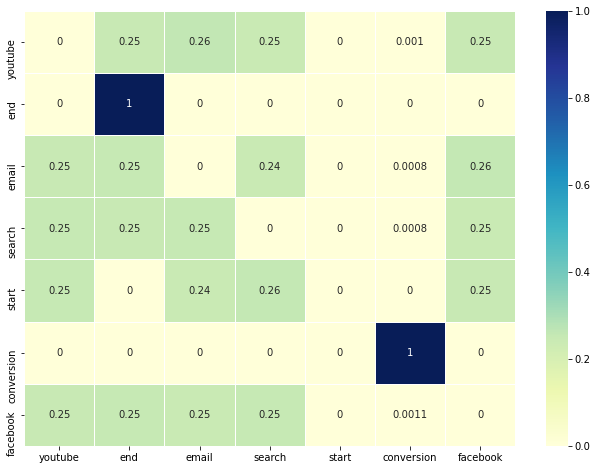

In [58]:
def channel_heatmap(trans_matrix):
    fig, ax = plt.subplots(figsize = (11,8))
    ax = sns.heatmap(trans_matrix, annot = True, cmap="YlGnBu", linewidths= 1, linecolor = 'white')
    
channel_heatmap(trans_matrix)

In [91]:
def gender_heatmap(df, gender):
    focus = df[df['gender'] == gender]
    path = focus[['uid','channel']]
    num_paths = path['channel']
    base_r = base_rate(num_paths)
    trans_states = transition_states(num_paths)
    trans_prob = transition_prob(trans_states)
    t_matrix = transition_matrix(num_paths, trans_prob)
    return channel_heatmap(t_matrix)

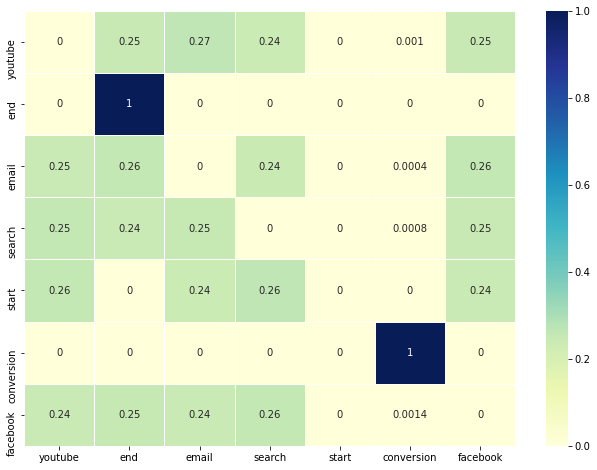

In [92]:
gender_heatmap(path, 'Male')

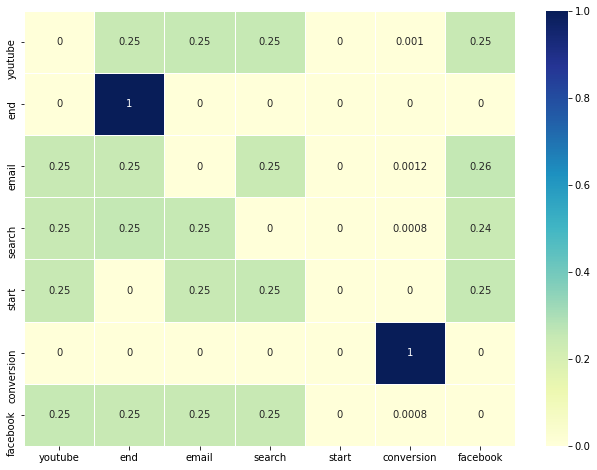

In [93]:
gender_heatmap(path, 'Female')

In [94]:
def age_heatmap(df, age):
    focus = df[df['age'] == age]
    path = focus[['uid','channel']]
    num_paths = path['channel']
    base_r = base_rate(num_paths)
    trans_states = transition_states(num_paths)
    trans_prob = transition_prob(trans_states)
    t_matrix = transition_matrix(num_paths, trans_prob)
    return channel_heatmap(t_matrix)

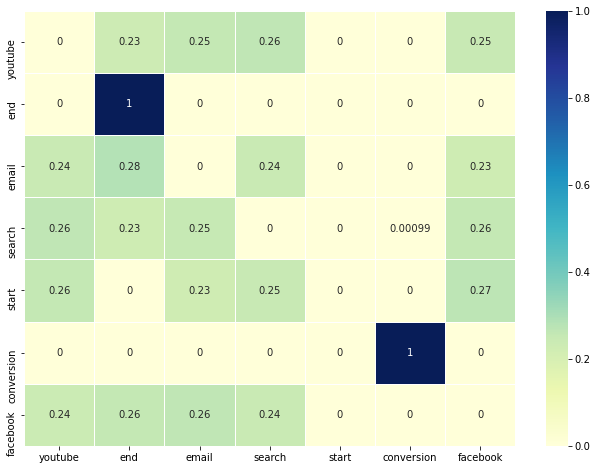

In [95]:
age_heatmap(path, 'Boomer')

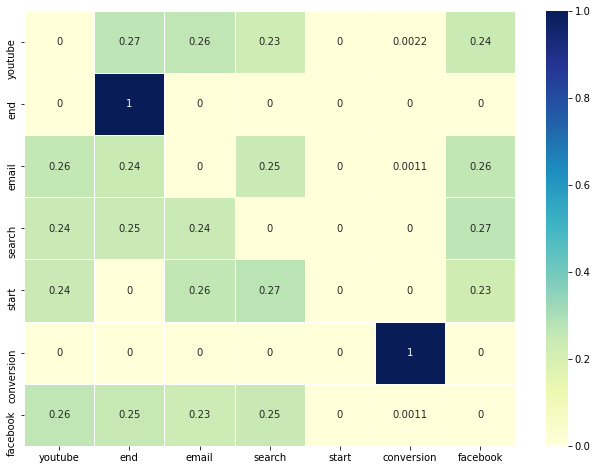

In [96]:
age_heatmap(path, 'Gen Z')

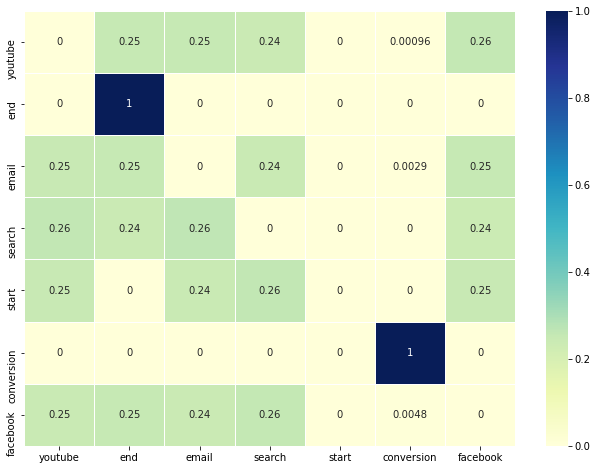

In [97]:
age_heatmap(path, 'Millenial')

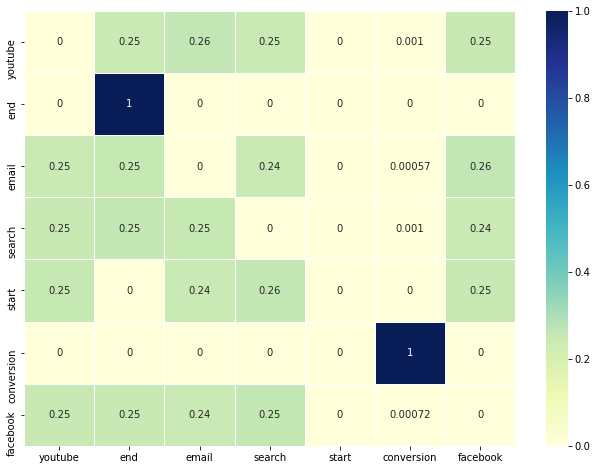

In [98]:
age_heatmap(path, 'Gen Alpha')

In [56]:
#assessing how much impact removing the channel from our marketing plan

def removal_effects(df, conversion_rate):
    removal_effects_dict = {}
    channels = [channel for channel in df.columns if channel not in ['start',
                                                                     'end',
                                                                     'conversion']]
    for channel in channels:
        removal_df = df.drop(channel, axis=1).drop(channel, axis=0)
        for column in removal_df.columns:
            row_sum = np.sum(list(removal_df.loc[column]))
            null_pct = float(1) - row_sum
            if null_pct != 0:
                removal_df.loc[column]['end'] = null_pct
            removal_df.loc['end']['end'] = 1.0

        removal_to_conv = removal_df[
            ['end', 'conversion']].drop(['end', 'conversion'], axis=0)
        removal_to_non_conv = removal_df.drop(
            ['end', 'conversion'], axis=1).drop(['end', 'conversion'], axis=0)

        removal_inv_diff = np.linalg.inv(
            np.identity(
                len(removal_to_non_conv.columns)) - np.asarray(removal_to_non_conv))
        removal_dot_prod = np.dot(removal_inv_diff, np.asarray(removal_to_conv))
        removal_cvr = pd.DataFrame(removal_dot_prod,
                                   index=removal_to_conv.index)[[1]].loc['start'].values[0]
        removal_effect = 1 - removal_cvr / conversion_rate
        removal_effects_dict[channel] = removal_effect

    return removal_effects_dict


removal_effects_dict = removal_effects(trans_matrix, base_rate)
removal_effects_dict

{'youtube': 0.635507344253466,
 'email': 0.6046550613893137,
 'search': 0.6086409445645411,
 'facebook': 0.64662344802324}

In [116]:
def chain_allocations(removal_effects, total_conversions):
    re_sum = np.sum(list(removal_effects.values()))

    return {k: round((v / re_sum) * total_conversions,2) for k, v in removal_effects.items()}


attributions = chain_allocations(removal_effects_dict, total_conversion)
attributions

{'youtube': 9.42, 'email': 8.97, 'search': 9.02, 'facebook': 9.59}

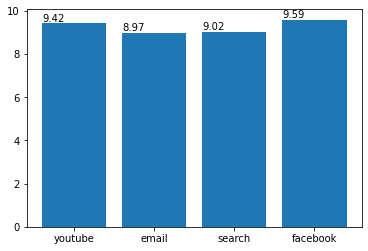

In [155]:
# f, ax = plt.subplots(figsize = (7,8))
y = list(attributions.values())
x = list(attributions.keys())
ax = plt.bar(x = x, height=y)
for bar in ax:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .1, yval, ha = 'left')


In [103]:
#Attribution levels for females

def gender_attribution(df, gender):
    focus = df[df['gender'] == gender]
    path = focus[['uid','channel']]
    num_paths = path['channel']
    total_conversion = sum(path.count('conversion') for path in num_paths.tolist())
    base_r = base_rate(num_paths)
    trans_states = transition_states(num_paths)
    trans_prob = transition_prob(trans_states)
    t_matrix = transition_matrix(num_paths, trans_prob)
    removal = removal_effects(t_matrix, base_r)
    attribution = chain_allocations(removal, total_conversion)
    return attribution

gender_attribution(path, 'Female')

{'youtube': 5.027724313947689,
 'email': 6.006963494816573,
 'search': 3.954950705444746,
 'facebook': 4.010361485790991}

In [101]:
gender_attribution(path, 'Male')

{'youtube': 5.074721665560442,
 'email': 1.8102084198883883,
 'search': 4.153691820495135,
 'facebook': 6.961378094056034}

(<BarContainer object of 4 artists>,
 {'youtube': -6.91757173658489,
  'email': -5.164750571611438,
  'search': -8.195457579521841,
  'facebook': -3.767050267214853})

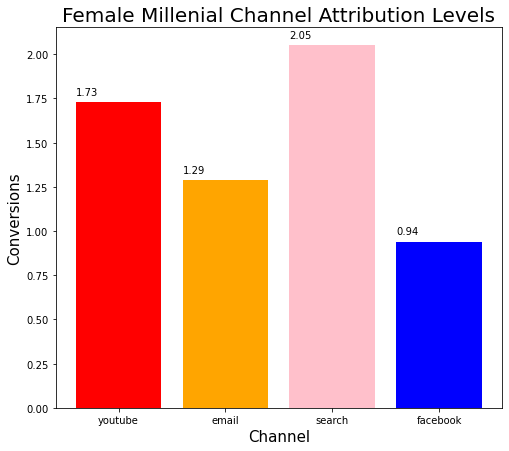

In [179]:
def demographic_attribution(df, age, gender):
    focus = df[(df['age'] == age) & (df['gender'] == gender)]
    path = focus[['uid','channel']]
    num_paths = path['channel']
    total_conversion = sum(path.count('conversion') for path in num_paths.tolist())
    base_r = base_rate(num_paths)
    trans_states = transition_states(num_paths)
    trans_prob = transition_prob(trans_states)
    t_matrix = transition_matrix(num_paths, trans_prob)
    removal = removal_effects(t_matrix, base_r)
    attribution = chain_allocations(removal, total_conversion)
    
    plt.figure(figsize = (8,7))
    x = list(attribution.keys())
    y = list(attribution.values())
    ax = plt.bar(x = x, height=y, color = ['red', 'orange', 'pink', 'blue'])
    for bar in ax:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .04, yval, ha = 'left')
    plt.ylabel('Conversions', size = 15)
    plt.xlabel('Channel', size = 15)
    plt.title(f'{gender} {age} Channel Attribution Levels', size = 20)
    return ax, removal

demographic_attribution(path, 'Millenial', 'Female')

(<BarContainer object of 4 artists>,
 {'youtube': 0.5047773432127391,
  'email': 0.4063713606084929,
  'search': 0.5027518134757266,
  'facebook': 0.4395929991488837})

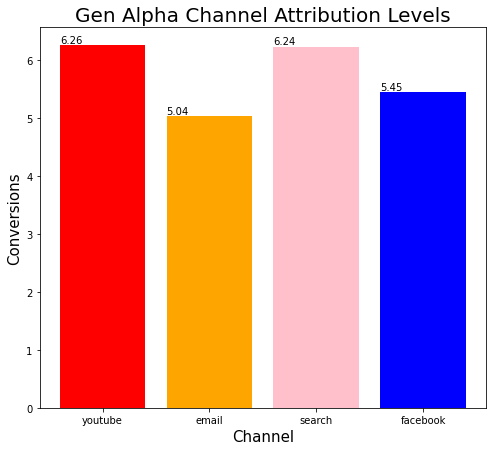

In [182]:
def age_attribution(df, age):
    focus = df[(df['age'] == age)]
    path = focus[['uid','channel']]
    num_paths = path['channel']
    total_conversion = sum(path.count('conversion') for path in num_paths.tolist())
    base_r = base_rate(num_paths)
    trans_states = transition_states(num_paths)
    trans_prob = transition_prob(trans_states)
    t_matrix = transition_matrix(num_paths, trans_prob)
    removal = removal_effects(t_matrix, base_r)
    attribution = chain_allocations(removal, total_conversion)
    
    plt.figure(figsize = (8,7))
    x = list(attribution.keys())
    y = list(attribution.values())
    ax = plt.bar(x = x, height=y, color = ['red', 'orange', 'pink', 'blue'])
    for bar in ax:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .04, yval, ha = 'left')
    plt.ylabel('Conversions', size = 15)
    plt.xlabel('Channel', size = 15)
    plt.title(f'{age} Channel Attribution Levels', size = 20)
    return ax, removal

age_attribution(path, 'Gen Alpha')